In [32]:
%matplotlib inline

## Make cut on subhalo mass at $M_{\rm peak} >= 10^{11.25}M_{\odot}$

In [14]:
from retrieve_halocat import retrieve_halocat

log_mpeak_subhalo_cut = 11.75
log_mpeak_host_cut = 11.25

halocat = retrieve_halocat(10**log_mpeak_subhalo_cut, 10**log_mpeak_host_cut)

In [29]:
import composite_models
reload(composite_models)

host_haloprop_bins = 10**np.array((12, 12.5, 13, 13.5, 14, 14.5))
host_haloprop_bins = np.append(np.insert(host_haloprop_bins, 0, 0), np.inf)

model = composite_models.composite_model(9.5, host_haloprop_bins=host_haloprop_bins)

model.populate_mock(halocat)

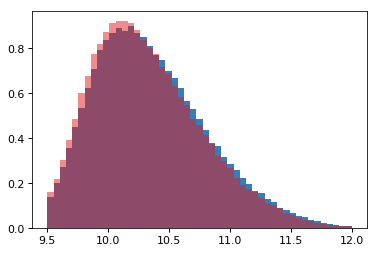

In [33]:
from halotools.empirical_models import ZuMandelbaum15SmHm
zu_mandelbaum = ZuMandelbaum15SmHm()

bsm = zu_mandelbaum.mc_stellar_mass(prim_haloprop=halocat.halo_table['halo_mpeak'], redshift=0)
beh_mask = bsm > 10**model.threshold
beh_mpeak = halocat.halo_table['halo_mpeak'][beh_mask]
beh_sm = bsm[beh_mask]


fig, ax = plt.subplots(1, 1)

logsm_bins = np.linspace(model.threshold, 12, 50)
__=ax.hist(np.log10(beh_sm), bins=logsm_bins, normed=True, color=blue)
__=ax.hist(np.log10(model.mock.galaxy_table['stellar_mass']), bins=logsm_bins, normed=True, 
          color=red, alpha=0.5)

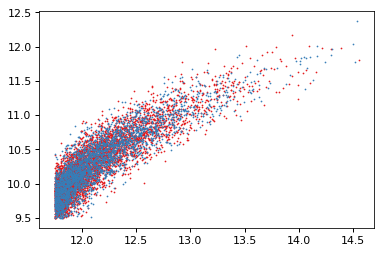

In [34]:
fig, ax = plt.subplots(1, 1)

x = np.log10(beh_mpeak)
y = np.log10(beh_sm)
len(beh_sm), len(beh_mask)

x2 = np.log10(model.mock.galaxy_table['halo_mpeak'])
y2 = np.log10(model.mock.galaxy_table['stellar_mass'])
__=ax.scatter(x2[::50], y2[::50], s=0.5, color=red)
__=ax.scatter(x[::50], y[::50], s=0.5, color=blue)
